In [53]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error



# Lade die CSV-Datei (angenommen, die Datei heißt "data.csv")
data = pd.read_csv("initial_data.csv")

# Teile die Daten in Features (X) und Ziel (y) auf
X = data.drop(columns=["Engine speed", "Engine load", "Railpressure", "Air supply", "Crank angle", "Intake pressure", "Back pressure", "Intake temperature"]).values
y = data[["NOx", "PM 1", "CO2", "PM 2", "Pressure cylinder"]].values

# Teile die Daten in Trainings- und Testsets auf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisiere die Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trainiere ein Support Vector Regressor (SVR)-Modell
svr = SVR(kernel="linear", C=1, epsilon=0.1)
multi_output_svr = MultiOutputRegressor(svr)
multi_output_svr.fit(X_train_scaled, y_train)

# Mache Vorhersagen auf dem Testset
y_pred = multi_output_svr.predict(X_test_scaled)





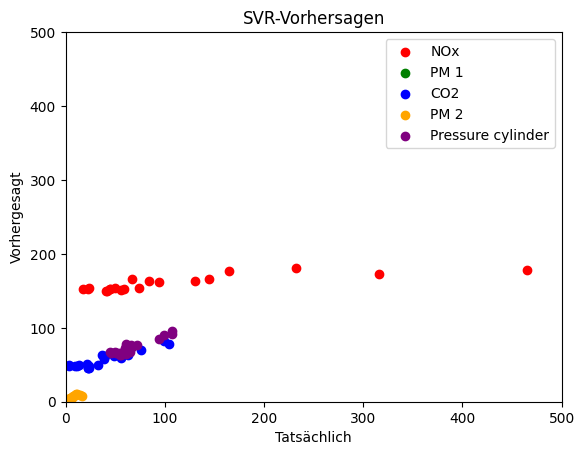

In [41]:

# Zeige die SVR-Vorhersagen in einem Diagramm
plt.xlim(0,500)
plt.ylim(0,500)
plt.scatter(y_test[:, 0], y_pred[:, 0], color="red", label="NOx")
plt.scatter(y_test[:, 1], y_pred[:, 1], color="green", label="PM 1")
plt.scatter(y_test[:, 2], y_pred[:, 2], color="blue", label="CO2")
plt.scatter(y_test[:, 3], y_pred[:, 3], color="orange", label="PM 2")
plt.scatter(y_test[:, 4], y_pred[:, 4], color="purple", label="Pressure cylinder")
plt.xlabel("Tatsächlich")
plt.ylabel("Vorhergesagt")
plt.title("SVR-Vorhersagen")
plt.legend()
plt.show()

In [8]:
# Berechne die Abweichung (Residuen) für jedes Ausgabeattribut
residuen = y_test - y_pred

# Berechne den durchschnittlichen absoluten Fehler für jedes Ausgabeattribut
mae = np.mean(np.abs(residuen), axis=0)
for i in range(0,5):
    mse = mean_squared_error(y_test[:,i], y_pred[:,i])
    #print(str(i) + ". mse: " + str(mse))
    varianz = np.var(y_test[:,i])
    print("normalisiert \t" + str(mse/varianz))

# Gib die durchschnittlichen absoluten Fehler für jedes Ausgabeattribut aus
for i in range(y_test.shape[1]):
    print(f"Durchschnittlicher absoluter Fehler für Ausgabespalte {i+1}: {mae[i]}")

normalisiert 	0.7024499539117977
normalisiert 	0.3564594739750813
normalisiert 	0.3868761550232819
normalisiert 	0.6995197349881594
normalisiert 	0.4004169936470325
Durchschnittlicher absoluter Fehler für Ausgabespalte 1: 73.07752498382749
Durchschnittlicher absoluter Fehler für Ausgabespalte 2: 0.5744247318468839
Durchschnittlicher absoluter Fehler für Ausgabespalte 3: 13.777566827110823
Durchschnittlicher absoluter Fehler für Ausgabespalte 4: 1.702744780745035
Durchschnittlicher absoluter Fehler für Ausgabespalte 5: 10.335600060548142


In [38]:
yo = pd.DataFrame(y_pred)
for i in range(0,5):
    print(str(y_pred[:,i].min()) + " - " +str(y_pred[:,i].max()))
print("-----")
for i in range(0,5):
    print(str(y[:,i].min()) + " - " +str(y[:,i].max()))


33.625170096264526 - 391.44579155827057
0.33091421076572525 - 3.661141159937283
5.9671593777472935 - 101.85222081526467
0.856909180017583 - 13.234934993720955
48.776447199973205 - 107.80921791405551
-----
17.977837673560735 - 703.8246607171793
0.1511387322084335 - 5.698707405990675
2.8916283610802 - 163.08052044212317
0.7220990913233775 - 16.283255006155805
44.94630187431548 - 160.04737531670222


In [54]:
for i in range(0,5):
    #mape = sklearn.mean(np.abs((y_test[:,i] - y_pred[:,i])/y_test[:,i])) * 100
    mape= mean_absolute_percentage_error(y_test[:,i], y_pred[:,i]) * 100
    print(mape)


30.6114996297435
4.466606013609396
6.723914559161319
2.1152695928539544
1.6149080653999548
